## Sales를 나머지 TV, Radio,Newspaper로 선형회귀하는 것이 목표

#### 첨부문서의 advertising1 과 advertising2를 결합 (index drop도 추가)




In [175]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns


from pandas import Series, DataFrame


df1 = pd.read_csv('./advertising1.csv', encoding='cp949' )
df2 = pd.read_csv('./advertising2.csv', encoding='cp949' )


In [97]:
df1

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [98]:
df2

,TV,Radio,Newspaper,Sales
0,43.1,26.7,35.1,10.1
1,228.0,37.7,32.0,21.5
2,202.5,22.3,31.6,16.6
3,177.0,33.4,38.7,17.1
4,293.6,27.7,1.8,20.7
...,...,...,...,...
157,38.2,3.7,13.8,7.6
158,94.2,4.9,8.1,14.0
159,177.0,9.3,6.4,14.8
160,283.6,42.0,66.2,25.5


In [99]:
df = pd.concat([df1, df2])
df = df.reset_index(drop=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### TV, Radio,Newspaper를 0부터 1까지로 정규화

In [100]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df)

df4 = pd.DataFrame(df_minmax, columns = ['TV', 'Radio', 'Newspaper', 'Sales'])

In [101]:
value_TV = np.array(df['TV'])
normalized_TV = preprocessing.normalize([value_TV])
normalized_TV

array([[0.09561706, 0.01849178, 0.00714739, 0.06295517, 0.07513066,
        0.00361525, 0.02389388, 0.04994859, 0.00357369, 0.08302603,
        0.02746757, 0.08921766, 0.00988999, 0.0405157 , 0.08481287,
        0.08119763, 0.028174  , 0.11693456, 0.02875576, 0.06120988,
        0.09075518, 0.09865055, 0.0054852 , 0.09486908, 0.0258885 ,
        0.10924696, 0.05938148, 0.09977252, 0.10338777, 0.02933753,
        0.12171333, 0.04691511, 0.04039104, 0.11036893, 0.03976772,
        0.12079913, 0.11090914, 0.03104126, 0.01791002, 0.09474442,
        0.084148  , 0.07355159, 0.12200421, 0.0859764 , 0.0104302 ,
        0.07276205, 0.03727445, 0.09968941, 0.09441198, 0.02780001,
        0.08302603, 0.04172079, 0.08992409, 0.07587864, 0.10916385,
        0.08265204, 0.00303348, 0.05659732, 0.08759703, 0.08755548,
        0.02223169, 0.10858209, 0.09944008, 0.04267654, 0.05447804,
        0.02867265, 0.01308969, 0.05788551, 0.09865055, 0.0900903 ,
        0.08273515, 0.04562692, 0.01113662, 0.05

In [102]:
value_Radio = np.array(df['Radio'])
normalized_Radio = preprocessing.normalize([value_Radio])
normalized_Radio

array([[0.09692057, 0.10076663, 0.11768927, 0.1058947 , 0.02769159,
        0.12538138, 0.08410039, 0.05025511, 0.00538448, 0.00666649,
        0.01487141, 0.06153687, 0.08999767, 0.01948668, 0.08435679,
        0.12230453, 0.09384373, 0.10153584, 0.05256274, 0.06128047,
        0.07102381, 0.01307659, 0.04076818, 0.04333221, 0.03230686,
        0.00897413, 0.07512626, 0.04281941, 0.06948538, 0.04102458,
        0.07256223, 0.04461423, 0.00384605, 0.05128073, 0.00358965,
        0.01051255, 0.11230479, 0.12666339, 0.06845977, 0.09666417,
        0.05717801, 0.08563881, 0.07102381, 0.02153791, 0.06589573,
        0.05769082, 0.02538396, 0.10640751, 0.04051177, 0.02999922,
        0.00794851, 0.02461475, 0.10692031, 0.11845848, 0.07384425,
        0.12666339, 0.07204942, 0.0492295 , 0.1271762 , 0.07563907,
        0.00512807, 0.10948435, 0.03974256, 0.07589547, 0.10974075,
        0.02384554, 0.06307529, 0.03717853, 0.070511  , 0.11256119,
        0.07845951, 0.03666572, 0.0846132 , 0.01

In [103]:
value_Newspaper = np.array(df['Newspaper'])
normalized_Newspaper = preprocessing.normalize([value_Newspaper])
normalized_Newspaper

array([[0.13052034, 0.08506456, 0.13070895, 0.11033873, 0.11015011,
        0.1414599 , 0.0443241 , 0.02187913, 0.00188613, 0.039986  ,
        0.0456444 , 0.00754453, 0.1242961 , 0.01358015, 0.08676207,
        0.09977639, 0.21501905, 0.10524617, 0.03451622, 0.03602512,
        0.10071945, 0.0443241 , 0.09355215, 0.04941666, 0.03451622,
        0.03677958, 0.02376526, 0.04319242, 0.04319242, 0.07695419,
        0.0814809 , 0.0728047 , 0.05658396, 0.00056584, 0.01395738,
        0.01603212, 0.00943066, 0.08619623, 0.06620324, 0.06035623,
        0.05960177, 0.07299331, 0.00339504, 0.04979389, 0.08166952,
        0.05941316, 0.06733491, 0.03489344, 0.09411799, 0.06940966,
        0.06526017, 0.00679008, 0.07469083, 0.11071595, 0.0299895 ,
        0.11316792, 0.07808587, 0.03130979, 0.07110718, 0.01754103,
        0.04036323, 0.10317142, 0.05149141, 0.01584351, 0.05450922,
        0.00169752, 0.00414949, 0.01923855, 0.02074745, 0.05130279,
        0.07299331, 0.05979039, 0.03640235, 0.05

In [104]:
normalized_TV

array([[0.09561706, 0.01849178, 0.00714739, 0.06295517, 0.07513066,
        0.00361525, 0.02389388, 0.04994859, 0.00357369, 0.08302603,
        0.02746757, 0.08921766, 0.00988999, 0.0405157 , 0.08481287,
        0.08119763, 0.028174  , 0.11693456, 0.02875576, 0.06120988,
        0.09075518, 0.09865055, 0.0054852 , 0.09486908, 0.0258885 ,
        0.10924696, 0.05938148, 0.09977252, 0.10338777, 0.02933753,
        0.12171333, 0.04691511, 0.04039104, 0.11036893, 0.03976772,
        0.12079913, 0.11090914, 0.03104126, 0.01791002, 0.09474442,
        0.084148  , 0.07355159, 0.12200421, 0.0859764 , 0.0104302 ,
        0.07276205, 0.03727445, 0.09968941, 0.09441198, 0.02780001,
        0.08302603, 0.04172079, 0.08992409, 0.07587864, 0.10916385,
        0.08265204, 0.00303348, 0.05659732, 0.08759703, 0.08755548,
        0.02223169, 0.10858209, 0.09944008, 0.04267654, 0.05447804,
        0.02867265, 0.01308969, 0.05788551, 0.09865055, 0.0900903 ,
        0.08273515, 0.04562692, 0.01113662, 0.05

In [105]:
df5 = pd.DataFrame({'TV': value_TV, 'Radio' : value_Radio, 'Newspaper' : value_Newspaper})
df5

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


#### Train dataset 과 test dataset을 4:1로 나누기

In [106]:
x_data = df5
value_Sales = np.array(df['Sales'])
y_data = value_Sales.reshape(value_Sales.size,1,)
y_data.shape 

(200, 1)

In [107]:

minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,5)).fit(x_data) # (1)
x_scaled_data = minmax_scale.transform(x_data) # (2)

x_scaled_data

array([[3.87893135, 3.81048387, 3.02990325],
       [0.74061549, 3.96169355, 1.97009675],
       [0.27899899, 4.62701613, 3.03430079],
       [2.54988164, 4.16330645, 2.55936675],
       [3.0453162 , 1.08870968, 2.55496922],
       [0.13527224, 4.92943548, 3.28496042],
       [0.96043287, 3.30645161, 1.02022867],
       [2.02062902, 1.97580645, 0.49692172],
       [0.13358133, 0.21169355, 0.03078276],
       [3.36658776, 0.26209677, 0.91908531],
       [1.10585052, 0.58467742, 1.05101143],
       [3.6185323 , 2.41935484, 0.16270888],
       [0.39059858, 3.53830645, 2.88478452],
       [1.63679405, 0.76612903, 0.30343008],
       [3.43929658, 3.31653226, 2.00967458],
       [3.29218803, 4.80846774, 2.31310466],
       [1.13459587, 3.68951613, 5.        ],
       [4.74636456, 3.99193548, 2.44063325],
       [1.15826852, 2.06653226, 0.79155673],
       [2.47886371, 2.40927419, 0.82673703],
       [3.68109571, 2.79233871, 2.33509235],
       [4.00236726, 0.5141129 , 1.02022867],
       [0.

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size=0.25)
X_train, X_test, y_train, y_test

(array([[3.87893135, 3.81048387, 3.02990325],
        [0.74061549, 3.96169355, 1.97009675],
        [3.59824146, 4.33467742, 1.47317502],
        [0.29083531, 3.79032258, 0.93667546],
        [0.6307068 , 4.0625    , 0.51011434],
        [3.17382482, 1.82459677, 1.11257696],
        [1.61481231, 1.49193548, 1.69744943],
        [3.74873182, 0.43346774, 2.176781  ],
        [2.0696652 , 3.48790323, 0.53210202],
        [1.75684816, 0.57459677, 1.49956025],
        [4.43354751, 0.35282258, 0.84432718],
        [3.65404126, 4.42540323, 1.18293755],
        [4.10043963, 4.93951613, 1.93491645],
        [0.07947244, 3.0141129 , 0.4001759 ],
        [3.66925938, 3.37701613, 2.58135444],
        [0.41088941, 1.10887097, 1.29287599],
        [1.4372675 , 3.60887097, 2.15479332],
        [2.94893473, 2.26814516, 1.37203166],
        [3.48664187, 0.84677419, 1.14775726],
        [0.52079811, 2.47983871, 0.08355321],
        [2.47886371, 2.40927419, 0.82673703],
        [2.78829895, 1.00806452, 0

#### 선형회귀, 라쏘회귀, 리지회귀, SGD회귀 네가지 방법의 회귀를 진행

In [109]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

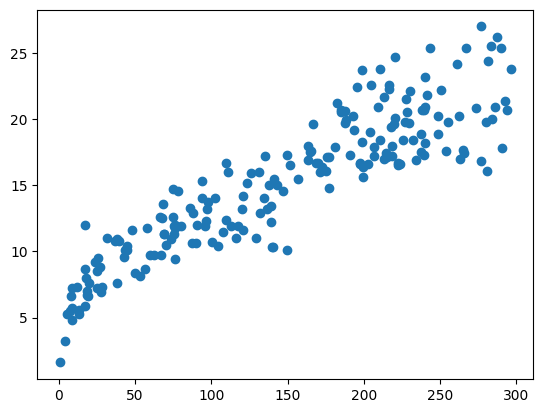

In [110]:
X = df["TV"]
y = df["Sales"]
plt.plot(X, y, 'o')
plt.show()

In [111]:
line_fitter = LinearRegression()
line_fitter.fit(X.values.reshape(-1,1), y)

LinearRegression()

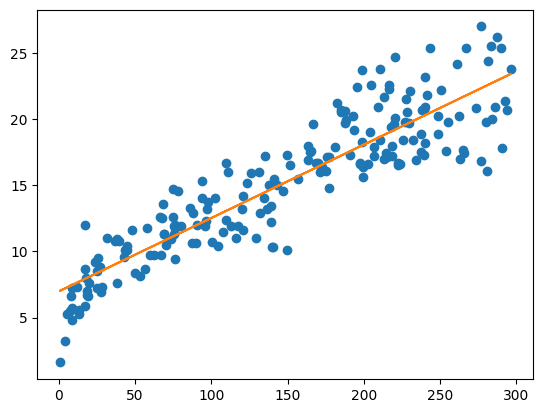

In [112]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.values.reshape(-1,1)))
plt.show()

In [113]:
from sklearn import  linear_model

regr = linear_model.LinearRegression(
         fit_intercept=True,normalize=False,copy_X=True, n_jobs=8)
lasso_regr = linear_model.Lasso(
         alpha=0.01, fit_intercept=True,normalize=False,copy_X=True)
ridge_regr = linear_model.Ridge(
         alpha=0.01, fit_intercept=True,normalize=False,copy_X=True)
SGD__regr = linear_model.SGDRegressor(penalty="l2", alpha=0.01, 
                                      max_iter=1000, tol=0.001, eta0=0.01)

In [114]:
regr.fit(X_train, y_train) 

c:\users\김아린\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(n_jobs=8, normalize=False)

#### 각각 기법으로 회귀한 뒤, test dataset을 통해 r2_score, mean_absolute_error, mean_squared_error 계산

In [115]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_true = y_test.copy()
y_hat = regr.predict(X_test)

r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.8872913555855688, 1.5662649959438806, 4.307690576926237)

#### 2X2 figure에 각각 회귀 방법에서 얻은 예측 sales값과 실제 sales 값을 scatter plot (test dataset에 대해서) 

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

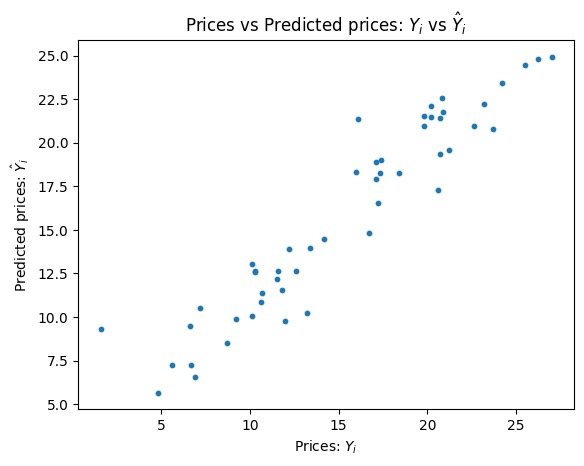

In [116]:
plt.scatter(y_true, y_hat, s=10)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# 로지스틱 회귀, 나이브 베이지안

## Survivied를 나머지 feature들을 통해 분류하는 것이 목표

#### 첨부문서의 train1 ~train4를 결합 (index drop도 추가)







In [198]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns


df_list = []
df_list.append(pd.read_csv('./train1.csv', encoding='cp949' ))
df_list.append(pd.read_csv('./train2.csv', encoding='cp949' ))
df_list.append(pd.read_csv('./train3.csv', encoding='cp949' ))
df_list.append(pd.read_csv('./train4.csv', encoding='cp949' ))

In [199]:
df = pd.concat(df_list, sort=False)

In [200]:
df = df.reset_index(drop=True)

In [201]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,NaN,NaN,NaN,NaN,NaN
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,NaN,NaN,NaN,NaN,NaN
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,NaN,NaN,NaN,NaN,NaN
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1777,887,NaN,NaN,NaN,NaN,NaN,NaN,0.0,211536,13.00,NaN,S
1778,888,NaN,NaN,NaN,NaN,NaN,NaN,0.0,112053,30.00,B42,S
1779,889,NaN,NaN,NaN,NaN,NaN,NaN,2.0,W./C. 6607,NaN,NaN,S
1780,890,NaN,NaN,NaN,NaN,NaN,NaN,0.0,111369,30.00,C148,C


#### Cabin feature 삭제


In [212]:
df.pop('Cabin')

df.dtypes

PassengerId     object
Survived       float64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Embarked        object
dtype: object

#### Age의 결측치는 다른 Age의 평균값으로 대체


In [213]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1777,False,True,True,True,True,True,True,False,False,False,False
1778,False,True,True,True,True,True,True,False,False,False,False
1779,False,True,True,True,True,True,True,False,False,True,False
1780,False,True,True,True,True,True,True,False,False,False,False


In [214]:
df.isnull().sum()

PassengerId       0
Survived        891
Pclass          891
Name            891
Sex             891
Age            1068
SibSp           891
Parch           891
Ticket          891
Fare            916
Embarked        893
dtype: int64

In [215]:
df_onehot = pd.get_dummies(df)
df_onehot.shape

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11216\4060574228.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_onehot = pd.get_dummies(df)


(1782, 2476)

In [216]:
df_onehot.isnull().sum()

Survived             891
Age                 1068
SibSp                891
Parch                891
Fare                 916
                    ... 
Ticket_W/C 14208       0
Ticket_WE/P 5735       0
Embarked_C             0
Embarked_Q             0
Embarked_S             0
Length: 2476, dtype: int64

In [217]:
df_onehot.loc[
    pd.isnull(df_onehot['Age']), "Age"] = df_onehot['Age'].mean()

In [218]:
df_onehot

,Survived,Age,SibSp,Parch,Fare,PassengerId_1,PassengerId_2,PassengerId_3,PassengerId_4,PassengerId_5,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.000000,1.0,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,38.000000,1.0,NaN,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,26.000000,0.0,NaN,NaN,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,35.000000,1.0,NaN,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,35.000000,0.0,NaN,NaN,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,NaN,29.699118,NaN,0.0,13.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1778,NaN,29.699118,NaN,0.0,30.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1779,NaN,29.699118,NaN,2.0,NaN,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1780,NaN,29.699118,NaN,0.0,30.00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [219]:
x_data = df_onehot.iloc[:, 1:].values
y_data = df_onehot.iloc[:, 0].values.reshape(-1, 1)
y_data.shape, x_data.shape

((1782, 1), (1782, 2475))

In [220]:
df_onehot

,Survived,Age,SibSp,Parch,Fare,PassengerId_1,PassengerId_2,PassengerId_3,PassengerId_4,PassengerId_5,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.000000,1.0,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,38.000000,1.0,NaN,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,26.000000,0.0,NaN,NaN,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,35.000000,1.0,NaN,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,35.000000,0.0,NaN,NaN,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,NaN,29.699118,NaN,0.0,13.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1778,NaN,29.699118,NaN,0.0,30.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1779,NaN,29.699118,NaN,2.0,NaN,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1780,NaN,29.699118,NaN,0.0,30.00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Fare의 결측치는 해당하는 Pclass의 Fare 평균값으로 대체
#### Embarked의 결측치는 S로 대체


In [221]:
df_fare = df[df["Age"].notnull()].groupby(
          ["Pclass"])["Age"].mean()
df_fare

Pclass
1.0    38.233441
2.0    29.877630
3.0    25.140620
Name: Age, dtype: float64

In [222]:
df_onehot.groupby('Pclass')['Fare'].mean()

KeyError: 'Pclass'

In [ ]:
df_onehot.loc[
    pd.isnull(df_onehot['Fare']), "Fare"] = df_onehot['Fare'].mean()

In [223]:
df_onehot

,Survived,Age,SibSp,Parch,Fare,PassengerId_1,PassengerId_2,PassengerId_3,PassengerId_4,PassengerId_5,...,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.000000,1.0,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,38.000000,1.0,NaN,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,26.000000,0.0,NaN,NaN,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,35.000000,1.0,NaN,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,35.000000,0.0,NaN,NaN,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,NaN,29.699118,NaN,0.0,13.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1778,NaN,29.699118,NaN,0.0,30.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1779,NaN,29.699118,NaN,2.0,NaN,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1780,NaN,29.699118,NaN,0.0,30.00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [224]:
df.loc[pd.isnull(df['Embarked']), "Embarked"] = 'S'

In [225]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,NaN,NaN,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,NaN,NaN,NaN,S
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,NaN,NaN,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,NaN,NaN,NaN,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,NaN,NaN,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1777,887,NaN,NaN,NaN,NaN,NaN,NaN,0.0,211536,13.00,S
1778,888,NaN,NaN,NaN,NaN,NaN,NaN,0.0,112053,30.00,S
1779,889,NaN,NaN,NaN,NaN,NaN,NaN,2.0,W./C. 6607,NaN,S
1780,890,NaN,NaN,NaN,NaN,NaN,NaN,0.0,111369,30.00,C


#### Sex, Pclass, Embarked에 대해 one-hot-encodoing하고 원래 데이터셋에 추가 
#### 3X1 figure를 그려서 Sex, Pclass, Embarked에 대해 Survivied의 countplot 그리기
#### 4X1 figure를 그려서 Age, SibSp, Parch, Fare대해 Survivied의 linetplot 그리기
#### 분류모델 학습에 사용하기 위해 원래 데이터셋의 object형 feature 삭제

In [226]:
def merge_and_get(ldf, rdf, on, how="inner", index=None):
    if index is True:
        return pd.merge(ldf,rdf, how=how, left_index=True,
                        right_index=True)
    else:
        return pd.merge(ldf,rdf, how=how, on=on)

In [227]:
one_hot_df = merge_and_get(
    df, pd.get_dummies(df["Sex"], prefix="Sex"), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
        df["Pclass"], prefix="Pclass"), on=None, index=True)
one_hot_df = merge_and_get(
    one_hot_df, pd.get_dummies(
        df["Embarked"], prefix="Embarked"), on=None, index=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11216\2898911767.py:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  one_hot_df, pd.get_dummies(


In [228]:

temp_columns = ["Sex", "Pclass", "Embarked"]

for col_name in temp_columns:
    temp_df = pd.merge(
        one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x="Survived", hue=col_name, data=temp_df)
    plt.show()

TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

In [229]:
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)
g = sns.catplot(x="Embarked",
                hue="Pclass",
                col="Survived",
                data=temp_df,
                kind="count",
                height=4, aspect=.7);

TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

In [230]:
crosscheck_columns = [col_name for col_name in one_hot_df.columns.tolist()
if col_name.split("_")[0] in temp_columns and "_" in col_name ] + ["Sex"]

# temp열
temp_df = pd.merge(one_hot_df[crosscheck_columns], y_true,
                   left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")

TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

In [ ]:
temp_columns = ["Sex", "Pclass", "Embarked"]



for col_name in temp_columns:
    temp_df = pd.merge(one_hot_df[col_name], y_true, left_index=True, right_index=True)
    sns.countplot(x="Survived", hue=col_name, data=temp_df)
    plt.show()

In [ ]:
temp_df = pd.merge(one_hot_df[temp_columns],
                   y_true, left_index=True,
                   right_index=True)
g = sns.catplot(x="Embarked",
                hue="Pclass",
                col="Survived",
                data=temp_df,
                kind="count",
                height=4, aspect=.7);

In [ ]:
temp_df = pd.merge(
    one_hot_df[temp_columns],
    y_true, left_index=True,
    right_index=True)
g = sns.catplot(x="Pclass",
                hue="Sex", col="Survived",
                data=temp_df, kind="count",
                height=4, aspect=.7)

## 데이터셋의 survived을 나머지 feature들로 로지스틱 회귀하기	(multinomial)
#### Confusion matrix 계산
#### print(classification_report(y_true, y_pred)) 을 통해서 결과 얻기
#### Test 데이터셋도 train dataset과 같이 전처리한 뒤, 로지스틱 회귀 모델을 통한 예측값 얻기 

In [231]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]
confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 3]], dtype=int64)

In [238]:
from sklearn.model_selection import train_test_split

X = df["Survived"]   # (1)
y = df["Fare"]   # (1)
X_train, X_test, y_train, y_test = train_test_split(X, y)   # (2)

In [239]:
X_train, X_test, y_train, y_test

(1652    NaN
 178     0.0
 1725    NaN
 1375    NaN
 392     0.0
        ... 
 969     NaN
 1560    NaN
 1729    NaN
 1465    NaN
 267     1.0
 Name: Survived, Length: 1336, dtype: float64,
 435     1.0
 213     0.0
 1324    NaN
 86      0.0
 526     1.0
        ... 
 1478    NaN
 1549    NaN
 1395    NaN
 85      1.0
 357     0.0
 Name: Survived, Length: 446, dtype: float64,
 1652     7.1250
 178         NaN
 1725     8.3000
 1375    91.0792
 392         NaN
          ...   
 969     29.0000
 1560    52.0000
 1729    56.4958
 1465     8.0500
 267         NaN
 Name: Fare, Length: 1336, dtype: float64,
 435        NaN
 213        NaN
 1324     7.125
 86         NaN
 526        NaN
          ...  
 1478    79.200
 1549    13.000
 1395    86.500
 85         NaN
 357        NaN
 Name: Fare, Length: 446, dtype: float64)

In [240]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class="ovr")
logreg_softmax = LogisticRegression(multi_class="multinomial", solver="sag")

logreg_ovr.fit(X_train, y_train)
logreg_softmax.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[nan  0. nan ... nan nan  1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [241]:
from sklearn.metrics import confusion_matrix
y_pred = logreg_ovr.predict(X_test).copy()
y_true = y_test.copy()
confusion_matrix(y_true, y_pred)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## 데이터셋의 survived을 나머지 feature들로 가우시안 나이브 베이지안 적용
#### Confusion matrix 계산
#### print(classification_report(y_true, y_pred)) 을 통해서 결과 얻기
#### Test 데이터셋도 train dataset과 같이 전처리한 뒤, 로지스틱 회귀 모델을 통한 예측값 얻기 

In [243]:
Y_data = df.pop("Survived")
Y_data = Y_data.values
x_df = pd.get_dummies(df)
x_df.head(10).T

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11216\3364880848.py:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x_df = pd.get_dummies(df)


,0,1,2,3,4,5,6,7,8,9
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0
SibSp,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PassengerId_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
Ticket_W/C 14208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ticket_WE/P 5735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Embarked_C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Embarked_Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [244]:
x_data = x_df.values
x_data

array([[22.,  1., nan, ...,  0.,  0.,  1.],
       [38.,  1., nan, ...,  0.,  0.,  1.],
       [26.,  0., nan, ...,  0.,  0.,  1.],
       ...,
       [nan, nan,  2., ...,  0.,  0.,  1.],
       [nan, nan,  0., ...,  1.,  0.,  0.],
       [nan, nan,  0., ...,  0.,  1.,  0.]])

In [250]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_data, Y_data)

ValueError: Input y contains NaN.